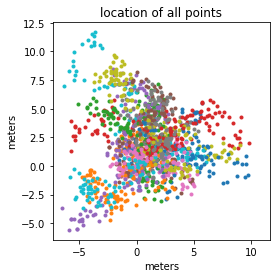

In [341]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import statistics
import copy

%matplotlib inline

tmp = sio.loadmat("location.mat")

tracks = {}
for trackno in range(30):
    # has 30 track numbers, each having 50 2d points
    tracks[trackno] = tmp["num%d"%(trackno)]
        
plt.close("all")
for trackno in range(30):
    plt.plot(tracks[(trackno)][:,0],tracks[(trackno)][:,1],'.')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.title('location of all points')
plt.show()

X = []
for trackno in range(30):
    for i in range(0, len(tracks[trackno])):
        point = tracks[trackno][i]
        X.append(point)

In [342]:
# X (1500,2) 1500 data points
# K: number of cluster
# numOfIter: -1 when the user want the convergence, otherwise specify a number
# kmeans: 1 if we want the k means algo, 0 if we want the k median algo

def kmeans(X, K, numOfIter, k_means):  
    # randomly initialize cluster centers
    C = np.zeros([5,2])
    np.random.shuffle(X) # will change the value of input X after calling this method
    for k in range(K):
        C[k] = X[k] # the first K points in X
    
    # should use deep copy for numpy array
    C_new = copy.deepcopy(C)  
    if numOfIter == -1:
        iteration = 0
        # if there is any change, keep updating until convergence
        while True:
            iteration += 1
            bins = {}
            for k in range(K):
                bins[k] = []
            # for each point in X, find the cluster that is nearest
            for pt in X:
                dist = np.zeros(K)
                for k in range(K):
                    dist[k] = np.sqrt(np.power(pt[0]-C_new[k][0],2) + np.power(pt[1]-C_new[k][1],2))
                idx = np.argmin(dist)
                bins[idx].append(pt)
            for k in range(K):
                # cluster centers' update
                m_x = []
                m_y = []
                length = len(bins[k])
                for l in range(length):
                    m_x.append(bins[k][l][0])
                    m_y.append(bins[k][l][1])
                if k_means == 1:
                    C_new[k] = np.array([statistics.mean(m_x), statistics.mean(m_y)])
                elif k_means == 0:
                    C_new[k] = np.array([statistics.median(m_x), statistics.median(m_y)])
            if np.array_equal(C_new, C):
                print ("Number of iterations when converged:", iteration)
                return C_new
            else:
                C = copy.deepcopy(C_new)
                  
    # when the user limit the number of iteration
    for iter in range(numOfIter):
        bins = {}
        for k in range(K):
            bins[k] = []
        for pt in X:
            dist = np.zeros(K)
            for k in range(K):
                dist[k] = np.sqrt(np.power(pt[0]-C[k][0],2) + np.power(pt[1]-C[k][1],2))
            idx = np.argmin(dist)
            bins[idx].append(pt)
        for k in range(K):
            # cluster center update
            m_x = []
            m_y = []
            length = len(bins[k])
            for l in range(length):
                m_x.append(bins[k][l][0])
                m_y.append(bins[k][l][1])
            if k_means == 1:
                C[k] = np.array([statistics.mean(m_x), statistics.mean(m_y)])
            elif k_means == 0:
                C[k] = np.array([statistics.median(m_x), statistics.median(m_y)])      
    return C


The center points are:
[[ 5.03260162  1.60696645]
 [-3.40256633 -2.52823357]
 [ 0.66588702  0.47089341]
 [-2.21881431  6.55083163]
 [ 1.2259242   4.0501308 ]]


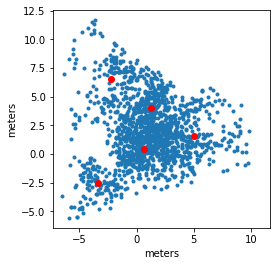

In [343]:
# Under the same number of iterations, we can still get different center points

C = kmeans(X, K=5, numOfIter=30, k_means=1)
print ('\nThe center points are:')
print (C)

X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]
    
plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
plt.plot(C[:,0],C[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()


The center points are:
[[ 5.03260162  1.60696645]
 [-2.21881431  6.55083163]
 [ 0.67000277  0.45289479]
 [-3.40256633 -2.52823357]
 [ 1.21239216  4.02695346]]


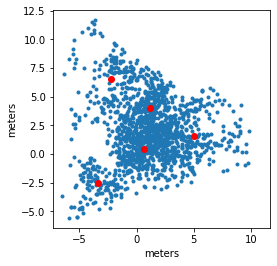

In [344]:
C = kmeans(X, K=5, numOfIter=30, k_means=1)
print ('\nThe center points are:')
print (C)

X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]
    
plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
plt.plot(C[:,0],C[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()

Number of iterations when converged: 30

The center points are:
[[-3.4315897  -2.48075816]
 [-0.48436304  5.67477491]
 [-0.08402464  0.80786923]
 [ 6.01659838  2.33825564]
 [ 2.66537662  1.18391705]]


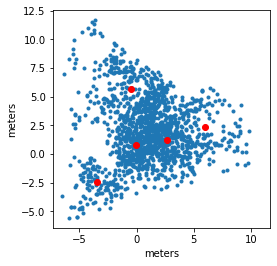

In [347]:
# Centers can be very different when converged with k-means

C = kmeans(X, K=5, numOfIter=-1, k_means=1)
print ('\nThe center points are:')
print (C)

X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]
    
plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
plt.plot(C[:,0],C[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()

Number of iterations when converged: 9

The center points are:
[[-3.40256633 -2.52823357]
 [ 0.61370022  0.44348329]
 [-2.21881431  6.55083163]
 [ 1.22708504  4.0145004 ]
 [ 4.96191571  1.57618222]]


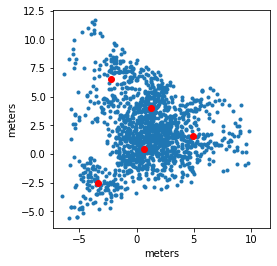

In [354]:
C = kmeans(X, K=5, numOfIter=-1, k_means=1)
print ('\nThe center points are:')
print (C)

X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]
    
plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
plt.plot(C[:,0],C[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()

Number of iterations when converged: 44

The center points are:
[[ 1.24530837  3.99859289]
 [-3.57942193 -2.50670987]
 [ 4.42108305  1.45925013]
 [ 0.58794638  0.65953546]
 [-1.98796133  6.96793344]]


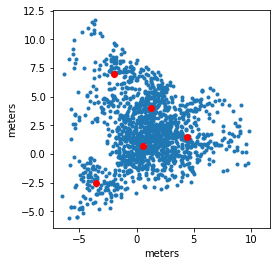

In [363]:
# Tested with k-medians, the result looked similarly as k-means

C = kmeans(X, K=5, numOfIter=-1, k_means=0)
print ('\nThe center points are:')
print (C)

X = np.zeros([30*50,2])

for trackno in range(30):
    X[(trackno*50):((trackno+1)*50),:] = tracks[trackno]
    
plt.close("all")
plt.plot(X[:,0],X[:,1],'.')
plt.plot(C[:,0],C[:,1],'ro')
plt.axis("square")
plt.xlabel("meters")
plt.ylabel("meters")
plt.show()